<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Copper_Price_History_USD.png" width="600px" height="400px" />

# Descarga y manipulación de precios históricos 

*Objetivos:*
- Aprender a importar datos desde archivos separados por comas (extensión `.csv`).
- Descargar el paquete `pandas-datareader`.
- Aprender a descargar datos desde fuentes remotas.

**Referencias:**
- http://pandas.pydata.org/
- https://pandas-datareader.readthedocs.io/en/latest/
___

## 1. Importar datos desde archivos locales

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Microsoft_Excel_2013_logo.svg" width="300px" height="125px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="125px" />

### 1.1. ¿Porqué?

- Muchas veces tenemos bases de datos proporcionadas como archivos locales.
- Para poder analizar, procesar y tomar decisiones con estos datos, es necesario importarlos a python.
- Ejemplos de archivos donde comúnmente se guardan bases de datos son: 
 - `.xls` o `.xlsx`
 -  `.cvs`
- Excel es ampliamente usado en distintos campos de aplicación en todo el mundo.
- Nos guste o no, esto también aplica a ciencia de datos (ingeniería financiera).
- Muchos de ustedes en su futuro académico y profesional tendrán que trabajar con estas hojas de cálculo, pero no siempre querrán trabajar directamente con ellas si tienen que hacer un análisis un poco más avanzado de los datos.
- Por eso en Python se han implementado herramientas para leer, escribir y manipular este tipo de archivos.

En esta clase veremos cómo podemos trabajar con Excel y Python de manera básica utilizando la librería *pandas*.

### 1.2. Reglas básicas para antes de leer hojas de cálculo

Antes de comenzar a leer una hoja de cálculo en Python (o cualquier otro programa), debemos considerar el ajustar nuestro archivo para cumplir ciertos principios, como:

- La primer fila de la hoja de cálculo se reserva para los títulos, mientras que la primer columna se usa para identificar la unidad de muestreo o indización de los datos (tiempo, fecha, eventos...)
- Evitar nombres, valores o campos con espacios en blanco. De otra manera, cada palabra se interpreta como variable separada y resultan errores relacionados con el número de elementos por línea.
- Los nombres cortos se prefieren sobre nombre largos.
- Evite símbolos como ?, $, %, ^, &, *, (,),-,#, ?, ,,<,>, /, |, \, [ ,] , {, y }.
- Borre cualquier tipo de comentario que haya hecho en su archivo para evitar columnas extras.
- Asegúrese de que cualquier valor inexistente esté indicado como NA.

Si se hizo algún cambio, estar seguro de guardarlo. 

Si estás trabajando con Microsoft Excel, verás que hay muchas opciones para guardar archivos, a parte de las extensiones por defecto .xls or .xlsx. Para esto ir a “Save As” y seleccionar una de las extensiones listadas en “Save as Type”. 

La extensión más común es .csv (archivos de texto separados por comas).

**Actividad.** Descargar precios de acciones de Apple (AAPL) de Yahoo Finance, con una ventana de tiempo desde el 01-01-2015 al 31-12-2017 y frecuencia diaria.

- Ir a https://finance.yahoo.com/.
- Buscar cada una de las compañías solicitadas.
- Dar click en la pestaña *'Historical Data'*.
- Cambiar las fechas en *'Time Period'*, click en *'Apply'* y, finalmente, click en *'Download Data'*.
- **¡POR FAVOR! GUARDAR ESTOS ARCHIVOS EN UNA CARPETA LLAMADA precios EN EL MISMO DIRECTORIO DONDE TIENEN ESTE ARCHIVO**.

### 1.3. Carguemos archivos .csv como ventanas de datos de pandas

Ahora podemos comenzar a importar nuestros archivos.

Una de las formas más comunes de trabajar con análisis de datos es en pandas. Esto es debido a que pandas está construido sobre NumPy y provee estructuras de datos y herramientas de análisis fáciles de usar.

In [1]:
import numpy as np
import datetime
import scipy.stats as stats

# Importamos pandas
import pandas as pd

#algunas opciones para Pandas
# pd.set_option('display.notebook_repr_html', False)
# pd.set_option('display.max_columns', 6)
# pd.set_option('display.max_rows', 10)
# pd.set_option('display.width', 78)
# pd.set_option('precision', 3)
pd.set_option('display.max_rows', 10)

Para leer archivos `.csv`, utilizaremos la función `read_csv` de pandas:

In [2]:
# Función read_csv
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read CSV (comma-separated) file into DataFrame
    
    Also supports optionally itera

In [47]:
# Cargamos hoja de calculo en un dataframe
activos = ['AAPL','KO','NKE','AMZN']
datos = [pd.read_csv('precios/%s.csv'%i,usecols=['Adj Close']) for i in activos] 
# datos = [datos[i]['Adj Close'] for i in range(len(activos))]
datos = pd.concat(datos,axis=1)
fechas = pd.read_csv('precios/AAPL.csv',usecols = ['Date'])
# # datos.index= datos['Date']
datos.columns = activos
datos.index = fechas['Date']
datos
# fechas

,AAPL,KO,NKE,AMZN
Date,,,,
2015-01-02,102.319397,37.229038,44.868027,308.519989
2015-01-05,99.436890,37.229038,44.145645,302.190002
2015-01-06,99.446251,37.511745,43.885963,295.290009
2015-01-07,100.840714,37.979980,44.792484,298.420013
2015-01-08,104.715256,38.439381,45.826481,300.459991
...,...,...,...,...
2017-12-22,173.023026,44.414360,62.768768,1168.359985
2017-12-26,168.633423,44.628693,63.125809,1176.760010
2017-12-27,168.663101,44.745594,62.431568,1182.260010


#### Anotación #1
- Quisieramos indizar por fecha.

In [4]:
# Cargamos hoja de calculo en un dataframe


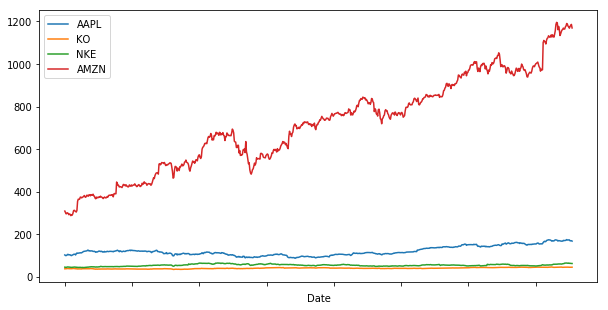

In [49]:
# Graficar precios de cierre y precios de cierre ajustados
import matplotlib.pyplot as plt
datos.plot(figsize=(10,5))
plt.show()

#### Anotación #2
- Para nuestra aplicación solo nos interesan los precios de cierre de las acciones (columna Adj Close).

In [6]:
# Cargamos hoja de calculo en un dataframe 'usecols'


**Actividad.** Importen todos los archivos .csv como acabamos de hacerlo con el de apple. Además, crear un solo DataFrame que cuyos encabezados por columna sean los nombres respectivos (AAPL, AMZN,...) y contengan los datos de precio de cierre.

## 2. Descargar los datos remotamente
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [50]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

El módulo data del paquete pandas_datareader contiene la funcion `DataReader`:

In [51]:
# Función DataReader
help(web.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, access_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (google, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("google", "fred", "ff")
    start : {datetime, None}
        left boundary for range (defaults to 1/1/2010)
    end : {datetime, None}
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given for symbol, represents the pause be

- A esta función le podemos especificar la fuente de los datos para que se use la api específica para la descarga de datos de cada fuente.
- Fuentes:
 - Google Finance: su api ya no sirve.
 - Quandl: solo permite descargar datos de acciones estadounidenses de manera gratuita. Es la base de datos más completa. Si se desea uasar hay que crear una cuenta para autenticarse en la API.
 - IEX: los datos tienen antiguedad máxima de 5 años y de equities estadounidenses.
 - Yahoo! Finance: su api ha tenido cambios significativos y ya no es posible usarla desde DataReader. Sin embargo permite obtener datos de distintas bolsas (incluida la mexicana), por eso le haremos la luchita.

In [53]:
# Ejemplo google finance >>>>>>>>>>>>>>>>(No funciona)
ticker = 'AAPL'
source = 'google'
start = '2015-01-01'
end = '2017-12-31'
# aapl_goo = web.DataReader(ticker, source, start, end)


## - Precios desde `quandl`

>Página oficial de `quandl` para crear cuenta y tutorial de instalación de su api
> https://docs.quandl.com/docs/python-installation

In [57]:
# Ejemplo quandl
import quandl
######################### USar la api key que les arroja la página de quandl
quandl.ApiConfig.api_key = "My9ygJsz7yTDx_9jcneH"

ticker = ['AAPL', 'MSFT','KO']
date = { 'gte': '2016-01-01', 'lte': '2016-12-31' }
column = { 'columns': ['ticker', 'date', 'Adj_close']}

data = quandl.get_table('WIKI/PRICES', qopts = column,ticker = ticker, date = date)# ticker = 'WIKI/AAPL' #'AAPL.US'
data = data.set_index('date') # Poner los índices como las fechas

# Seleccionar los ADJ_CLOSE de ticker
data_n = [data.loc[data['ticker']== i,'adj_close'] for i in ticker]
data_n = pd.concat(data_n,axis=1)
data_n.columns = ticker
data_n
#### data.loc[data['ticker']=='AAPL','adj_close']

,AAPL,MSFT,KO
date,,,
2016-12-30,114.389454,60.788710,40.438769
2016-12-29,115.288214,61.532183,40.575321
2016-12-28,115.317843,61.620226,40.370493
2016-12-27,115.811668,61.903920,40.585074
2016-12-23,115.080808,61.864790,40.575321
...,...,...,...
2016-01-08,93.677776,49.829617,39.206398
2016-01-07,93.185040,49.677262,39.310293
2016-01-06,97.291172,51.467434,39.971447


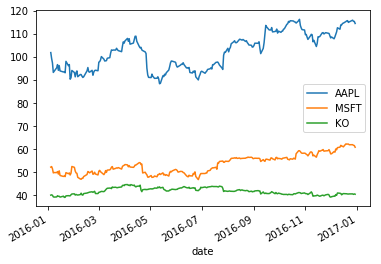

In [58]:
# Gráfica de precios ---> 'data_n[i].plot'
data_n.plot()

### Uso de Pandas para bajar datos de Yahoo! Finance
* Intentamos con la función YahooDailyReader y con la función DataReader

In [ ]:
# help(web.YahooDailyReader)

In [59]:
# YahooDailyReader
ticker = 'AEROMEX.MX'
start = '2015-01-01'
end = '2017-12-31'
aapl_yah = web.YahooDailyReader(ticker, start, end, interval='d').read()
aapl_yah

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,20.600000,19.200001,20.600000,19.389999,452156,19.389999
2015-01-05,20.590000,19.170000,19.700001,20.030001,467183,20.030001
2015-01-06,20.200001,19.270000,20.200001,19.570000,301361,19.570000
2015-01-07,19.950001,19.370001,19.670000,19.430000,222100,19.430000
2015-01-08,21.400000,19.430000,19.430000,20.840000,289943,20.840000
...,...,...,...,...,...,...
2017-12-22,30.299999,30.160000,30.250000,30.209999,208893,30.209999
2017-12-26,30.000000,29.820000,30.000000,29.879999,126312,29.879999
2017-12-27,30.000000,29.590000,29.860001,29.770000,330661,29.770000


In [60]:
# Observar que se puede usar usando las dos librerías ----> Cambiar la cantidad de tickers
closes = web.DataReader(name=ticker, data_source='yahoo', start=start, end=end)
closes

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,20.600000,19.200001,20.600000,19.389999,452156,19.389999
2015-01-05,20.590000,19.170000,19.700001,20.030001,467183,20.030001
2015-01-06,20.200001,19.270000,20.200001,19.570000,301361,19.570000
2015-01-07,19.950001,19.370001,19.670000,19.430000,222100,19.430000
2015-01-08,21.400000,19.430000,19.430000,20.840000,289943,20.840000
...,...,...,...,...,...,...
2017-12-22,30.299999,30.160000,30.250000,30.209999,208893,30.209999
2017-12-26,30.000000,29.820000,30.000000,29.879999,126312,29.879999
2017-12-27,30.000000,29.590000,29.860001,29.770000,330661,29.770000


Sin embargo no se pueden descargar varios a la vez. Intentémoslo hacer nosotros así sea de manera rudimentaria:

In [62]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [63]:
# Ejemplo: 'AAPL', 'MSFT', 'NVDA', '^GSPC'
ticker = ['AAPL', 'MSFT', 'NVDA', '^GSPC']
start = '2015-01-01'
end = '2017-12-31'
closes = get_adj_closes(tickers=ticker, start_date=start, end_date=end)
closes

Symbols,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,100.755898,42.122040,19.421080,2058.199951
2015-01-05,97.917427,41.734680,19.093056,2020.579956
2015-01-06,97.926666,41.122128,18.514183,2002.609985
2015-01-07,99.299805,41.644604,18.465944,2025.900024
2015-01-08,103.115128,42.869705,19.160582,2062.139893
...,...,...,...,...
2017-12-22,170.379120,83.112022,194.112244,2683.340088
2017-12-26,166.056595,83.005104,196.269379,2680.500000
2017-12-27,166.085815,83.306412,196.000977,2682.620117


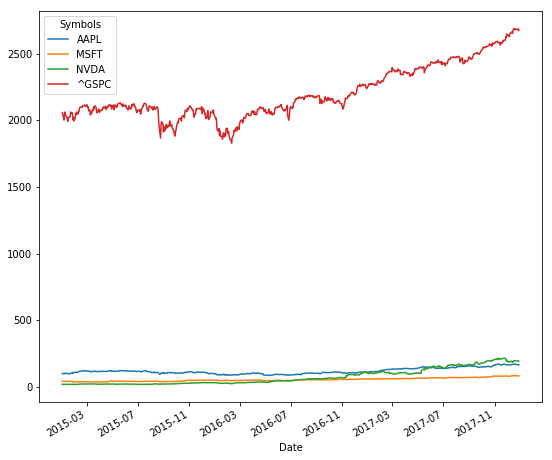

In [64]:
# Gráfica de datos
closes.plot(figsize=(9,8))

**Nota**: Para descargar datos de la bolsa mexicana de valores (BMV), el ticker debe tener la extensión MX. 
Por ejemplo: *MEXCHEM.MX*, *LABB.MX*, *GFINBURO.MX* y *GFNORTEO.MX*.

Como se puede notar, en este caso se consideran tres activos 
- Nvidia:NVDA
- Apple: AAPL
- Microsoft: MSFT

y, el índice 

- Standard & Poor's: 500S&P500.

Todos almacenados en la variable *closes*.

El objeto *assets* tiene la característica *items*. Con estos, se pueden verificar los registros almacenados

In [65]:
closes.items

<bound method DataFrame.iteritems of Symbols           AAPL       MSFT        NVDA        ^GSPC
Date                                                      
2015-01-02  100.755898  42.122040   19.421080  2058.199951
2015-01-05   97.917427  41.734680   19.093056  2020.579956
2015-01-06   97.926666  41.122128   18.514183  2002.609985
2015-01-07   99.299805  41.644604   18.465944  2025.900024
2015-01-08  103.115128  42.869705   19.160582  2062.139893
...                ...        ...         ...          ...
2017-12-22  170.379120  83.112022  194.112244  2683.340088
2017-12-26  166.056595  83.005104  196.269379  2680.500000
2017-12-27  166.085815  83.306412  196.000977  2682.620117
2017-12-28  166.553101  83.316124  196.229614  2687.540039
2017-12-29  164.752060  83.141182  192.352753  2673.610107

[755 rows x 4 columns]>

Acceder a alguna posición específica de la variable *closes*

In [66]:
closes.iloc[0,0]

100.75589752197266

In [67]:
closes.loc['2015-01-02','AAPL']

100.75589752197266

Si deseamos encontrar los precios de cierre en una fecha específica usamos *2015-08-14*

In [68]:
closes.loc['2015-07-02','AAPL']

117.47256469726562

O, finalmente, los valores del S&P500

In [69]:
closes['^GSPC']


Date
2015-01-02    2058.199951
2015-01-05    2020.579956
2015-01-06    2002.609985
2015-01-07    2025.900024
2015-01-08    2062.139893
                 ...     
2017-12-22    2683.340088
2017-12-26    2680.500000
2017-12-27    2682.620117
2017-12-28    2687.540039
2017-12-29    2673.610107
Name: ^GSPC, Length: 755, dtype: float64

### Actividad
Obtener datos históricos de
- GRUPO CARSO, S.A.B. DE C.V.
- GRUPO FINANCIERO INBURSA, S.A.B. DE C.V.
- GRUPO FINANCIERO BANORTE, S.A.B DE C.V.
- GRUPO AEROMÉXICO, S.A.B. DE C.V.

en el año 2014.

1. ¿Qué compañía reportó precios de cierre más altos en *2014-07-14*?
2. Obtener los precios de cierre de cada compañía en todo el año.
3. Comparar, para cada compañía, los precios de cierre entre *2014-01-02* y *2014-12-31*.

> Revisar los nombres de estas acciones en yahoo: https://finance.yahoo.com/

In [82]:
# Descargar todos los precios de los activos anteriores y almacenarlos en 'assets_mx'
ticker = ['GCARSOA1.MX','GFINBURO.MX','GFNORTEO.MX','AEROMEX.MX']
start = '2014-01-01'
end = '2014-12-31'
closes = get_adj_closes(ticker,start,end)
closes

Symbols,AEROMEX.MX,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX
Date,,,,
2014-01-02,18.049999,64.120766,33.051651,77.059006
2014-01-03,18.090000,64.473427,32.628384,77.792671
2014-01-06,18.469999,62.450237,31.745045,76.409691
2014-01-07,19.459999,61.967636,32.803211,76.687981
2014-01-08,18.990000,61.503601,31.919872,75.971191
...,...,...,...,...
2014-12-24,19.639999,68.927742,34.605583,68.436760
2014-12-26,19.629999,69.931732,34.949780,68.402702
2014-12-29,19.520000,70.288300,35.628868,69.075249


In [84]:
# Encontrar los precios en la fecha 2014-07-14
p_f1 = closes.loc['2014-07-14',ticker]
p_f1

Symbols
GCARSOA1.MX    67.863960
GFINBURO.MX    36.103302
GFNORTEO.MX    77.287239
AEROMEX.MX     22.070000
Name: 2014-07-14 00:00:00, dtype: float64

In [85]:
# Encontrar la acción que reportó mayor valor en la fecha 2014-07-14
p_f1.max(),p_f1.idxmax()

(77.28723907470703, 'GFNORTEO.MX')

In [86]:
# Otra forma de hacerlo usando la función pop(indice)
closes.pop(p_f1.idxmax())

Date
2014-01-02    77.059006
2014-01-03    77.792671
2014-01-06    76.409691
2014-01-07    76.687981
2014-01-08    75.971191
                ...    
2014-12-24    68.436760
2014-12-26    68.402702
2014-12-29    69.075249
2014-12-30    68.607025
2014-12-31    69.126328
Name: GFNORTEO.MX, Length: 251, dtype: float64

In [89]:
# Acceder a algunas filas particulares de los precios --> df.iloc
p_f2 = closes.iloc[2,:]
p_f2

Symbols
AEROMEX.MX     18.469999
GCARSOA1.MX    62.450237
GFINBURO.MX    31.745045
Name: 2014-01-06 00:00:00, dtype: float64

In [92]:
#encontrar la diferencias entre dos filas en particular --> df.iloc.diff.iloc
closes.iloc[3:5,:].diff().iloc[-1,:]

Symbols
AEROMEX.MX    -0.469999
GCARSOA1.MX   -0.464035
GFINBURO.MX   -0.883339
Name: 2014-01-08 00:00:00, dtype: float64

# 2. Graficos de las series de datos

En primer lugar, se toma como ejemplo la serie de precios `AEROMEX.MX`, así como el volumen de transacciones.

In [93]:
ticker = 'AEROMEX.MX'
start = '2015-01-01'
end = '2017-12-31'
aero_mx = web.DataReader(ticker, data_source='yahoo', start=start, end=end)
# Se extraen los precios de cierre y los volúmenes de transacción
clos_aero_mx = aero_mx['Adj Close']
# clos_aero_mx
vol_aero_mx = aero_mx['Volume']
vol_aero_mx
# vol_aero_mx.shape,clos_aero_mx.shape

Date
2015-01-02    452156
2015-01-05    467183
2015-01-06    301361
2015-01-07    222100
2015-01-08    289943
               ...  
2017-12-22    208893
2017-12-26    126312
2017-12-27    330661
2017-12-28    225042
2017-12-29    732755
Name: Volume, Length: 754, dtype: int64

El gráfico de esta serie se obtiene de forma simple mediante el siguiente comando

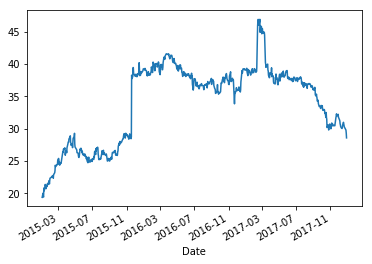

In [94]:
# Gráfico de los precios de cierre ajustados
clos_aero_mx.plot()

De forma similar, se grafica la serie de volúmenes de transacción

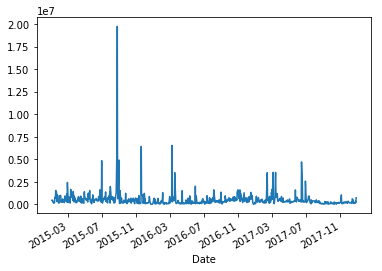

In [95]:
vol_aero_mx.plot()

Usualmente, es conveniente graficar al precio de cierre de una acción en conjunto con su volumen de transacciones. El siguiente es un ejemplo de esta clase de graficas para el caso de Aeroméxico.

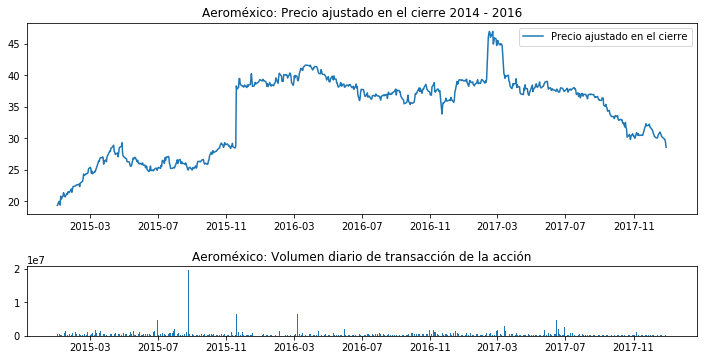

In [96]:
############## Forma de graficar 1
top = plt.subplot2grid((4,4), (0, 0), rowspan=2, colspan=4)
top.plot(clos_aero_mx.index, clos_aero_mx, label='Precio ajustado en el cierre')
plt.title('Aeroméxico: Precio ajustado en el cierre 2014 - 2016')
plt.legend(loc='best')
bottom = plt.subplot2grid((4,4), (2, 0), rowspan=1, colspan=4)
bottom.bar(vol_aero_mx.index, vol_aero_mx)
plt.title('Aeroméxico: Volumen diario de transacción de la acción')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)


############## Otra forma de graficar
# plt.figure(figsize=(10,10))
# plt.subplot(2,1,1)
# plt.plot(clos_aero_mx.index, clos_aero_mx, label='Precio ajustado en el cierre')
# plt.title('Aeroméxico: Precio ajustado en el cierre 2014 - 2016')
# plt.legend(loc='best')
# plt.xlim([clos_aero_mx.index[0],clos_aero_mx.index[-1]])
# plt.show()

# plt.figure(figsize=(10,5))
# plt.subplot(2,1,2)
# plt.bar(vol_aero_mx.index, vol_aero_mx)
# plt.title('Aeroméxico: Volumen diario de transacción de la acción')
# plt.xlabel('Date')
# plt.xlim([vol_aero_mx.index[0],vol_aero_mx.index[-1]])
# plt.ylim([0,.8e7])
# plt.show()

Otro procedimiento que se efectúa con frecuencia, es el cálculo de promedios y desviaciones móviles para la serie de precios. Los promedios móviles se calculan mediante:

In [97]:
short_rollmean_AM_AC = clos_aero_mx.rolling(window=20).mean()
long_rollmean_AM_AC = clos_aero_mx.rolling(window=100).mean()
short_rollmean_AM_AC

Date
2015-01-02        NaN
2015-01-05        NaN
2015-01-06        NaN
2015-01-07        NaN
2015-01-08        NaN
               ...   
2017-12-22    30.9975
2017-12-26    30.8920
2017-12-27    30.7785
2017-12-28    30.6360
2017-12-29    30.4540
Name: Adj Close, Length: 754, dtype: float64

Grafiquemos los precios junto con las medias móviles que acabamos de calcular

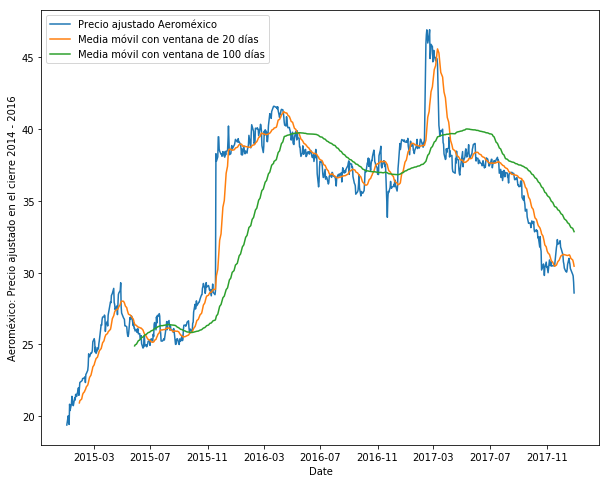

In [98]:
# %matplotlib notebook
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.plot(clos_aero_mx.index, clos_aero_mx, label='Precio ajustado Aeroméxico')
ax.plot(short_rollmean_AM_AC.index, short_rollmean_AM_AC, label='Media móvil con ventana de 20 días')
ax.plot(long_rollmean_AM_AC.index, long_rollmean_AM_AC, label='Media móvil con ventana de 100 días')
ax.set_xlabel('Date')
ax.set_ylabel('Aeroméxico: Precio ajustado en el cierre 2014 - 2016')
ax.legend(loc='best');

Las desviaciones estándar móviles se calculan con

In [99]:
short_rollstd_AM_AC = clos_aero_mx.rolling(window=20).std()
long_rollstd_AM_AC = clos_aero_mx.rolling(window=100).std()

y los gráficos...

In [100]:
clos_aero_mx

Date
2015-01-02    19.389999
2015-01-05    20.030001
2015-01-06    19.570000
2015-01-07    19.430000
2015-01-08    20.840000
                ...    
2017-12-22    30.209999
2017-12-26    29.879999
2017-12-27    29.770000
2017-12-28    29.330000
2017-12-29    28.590000
Name: Adj Close, Length: 754, dtype: float64

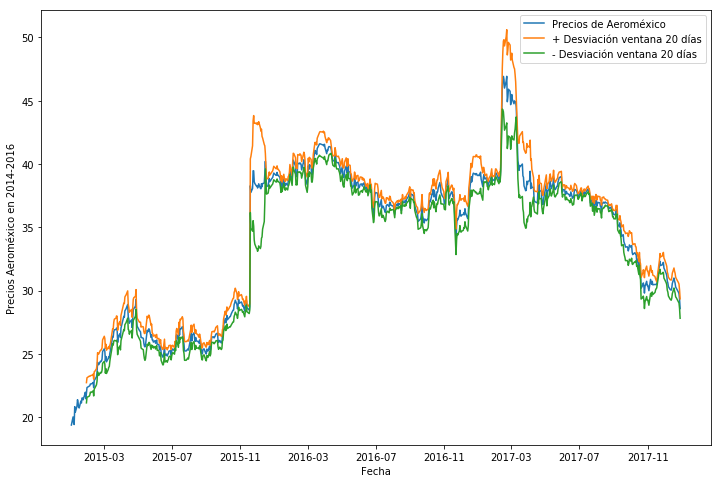

In [101]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(clos_aero_mx.index, clos_aero_mx, label = 'Precios de Aeroméxico')
ax.plot(clos_aero_mx.index, clos_aero_mx+short_rollstd_AM_AC, label = '+ Desviación ventana 20 días')
ax.plot(clos_aero_mx.index, clos_aero_mx-short_rollstd_AM_AC, label = '- Desviación ventana 20 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precios Aeroméxico en 2014-2016')
ax.legend(loc='best')

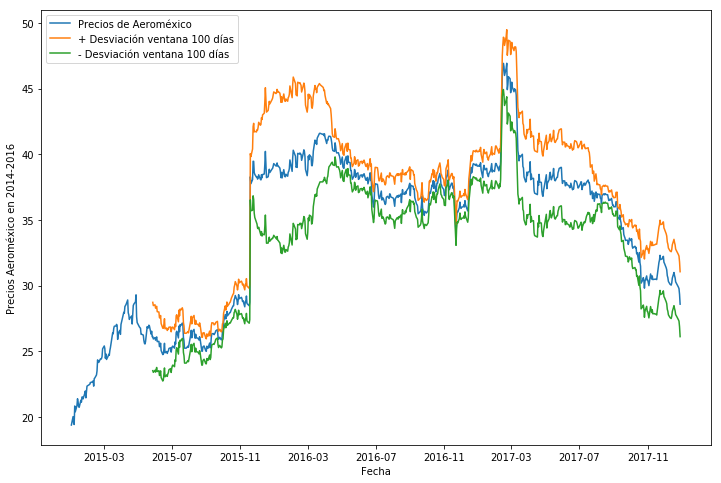

In [102]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(clos_aero_mx.index, clos_aero_mx, label = 'Precios de Aeroméxico')
ax.plot(clos_aero_mx.index, clos_aero_mx+long_rollstd_AM_AC, label = '+ Desviación ventana 100 días')
ax.plot(clos_aero_mx.index, clos_aero_mx-long_rollstd_AM_AC, label = '- Desviación ventana 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precios Aeroméxico en 2014-2016')
ax.legend(loc='best')

Podemos graficar los precios de las acciones americanas

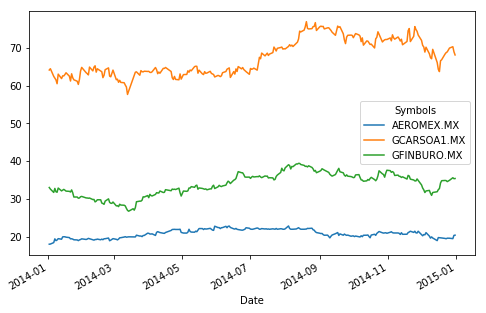

In [103]:
# Gráfica de los precios que almacenan los precios de los activos 
closes.plot(figsize=(8,5))

Sin embargo, vemos que los precios de cierre del índice S&P500 están muy por encima de los precios de cierre de los activos, lo cual dificulta la visualización. Entonces, obtenemos el gráfico de solo los activos

In [105]:
# closes[['AAPL','MSFT','NVDA']].plot()

**Conclusión**
- Aprendimos a importar datos desde archivos locales.
- Aprendimos a importar datos remotamente con el paquete pandas_datareader.

¿Ahora qué? Pues con estos históricos, obtendremos los rendimientos y ellos nos servirán como base para caracterizar la distribución de rendimientos... 

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez and modify by Oscar Jaramillo Z.
</footer>